# Project - IMBD Movie Analysis

### Data Preparation, and Cleaning

In [ ]:
# Import libraries
import pandas as pd
import scipy.stats as stats
import numpy as np
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt

# Import data
df = pd.read_csv('dataset/imdb.csv')
len(df)

In [ ]:
# Picking some variables
df = df[['IMDB_Rating', 'Series_Title', 'Released_Year', 'Runtime', 'Meta_score', 'Gross', 'Director']]
df.head()


In [ ]:
df.dtypes

In [ ]:
# Convert Released_Year to datetime
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df.dtypes

In [ ]:
# Create a decade variable
df['Decade'] = (df['Released_Year'] // 10 ) * 10
df.Decade.head()

In [ ]:
# Convert Runtime to Integer
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(int)
df.Runtime.head()

In [ ]:
# Replace missing values with 0
df[df.columns] = df[df.columns].fillna(0) # 
print(df.isna().sum())

In [ ]:
# Convert Gross to Integers then into Millions
# Remove commas and dollar signs
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')
df['Gross'] = df['Gross'] / 1000000


In [ ]:
df['Gross'] = round(df['Gross'], 2)
df['Gross'].head()

In [ ]:
df.head()

In [ ]:
df.drop('Released_Year', axis=1, inplace=True)

In [ ]:
df.columns

In [ ]:
# Convert Gross null values to 0
df['Gross'] = df['Gross'].fillna(0)
df.isnull().sum()

## EDA

In [ ]:
df.describe()

In [ ]:
# Histogram
sns.histplot(df.IMDB_Rating, bins=20, edgecolor='black', kde=True)

In [ ]:
# Study the top 10 directors with the highest IMBD ratings
# df.sort_values(by='IMDB_Rating', ascending=False).Director.head(10)
df_top_directors = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)
df_top_directors.plot(kind='hist', edgecolor='black', figsize=(5,3))

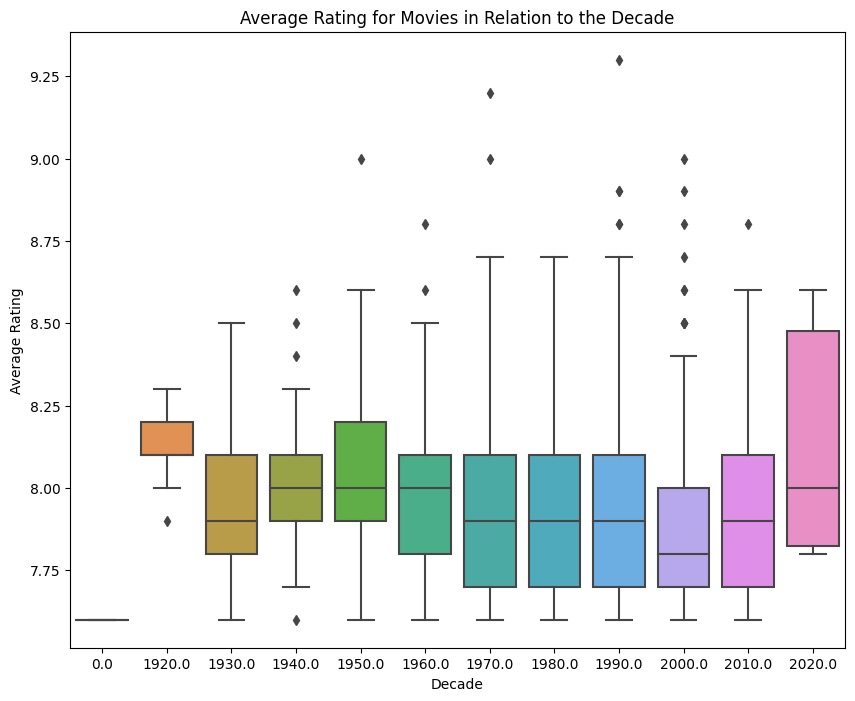

In [65]:
# Plot average rating for movies in relation to the decade
plt.figure(figsize=(10,8))
sns.boxplot(x='Decade', y='IMDB_Rating', data=df)
plt.title('Average Rating for Movies in Relation to the Decade')
plt.xlabel('Decade')
plt.ylabel('Average Rating')
plt.show()

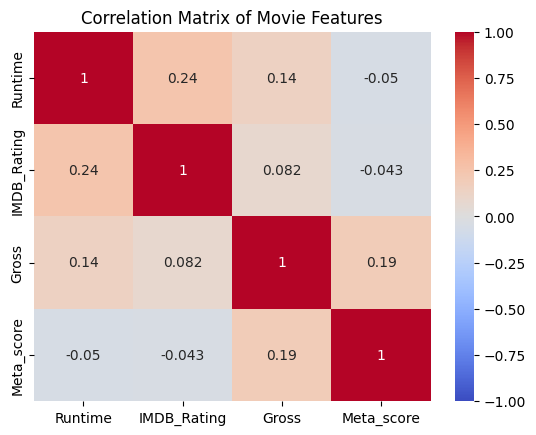

In [ ]:
# Correlation and Covariance

df_cov = df[['Runtime', 'IMDB_Rating', 'Gross', 'Meta_score']]

# Correlation Matrix Heatmap
df_cov.corr()
sns.heatmap(df_cov.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Movie Features')
plt.show()

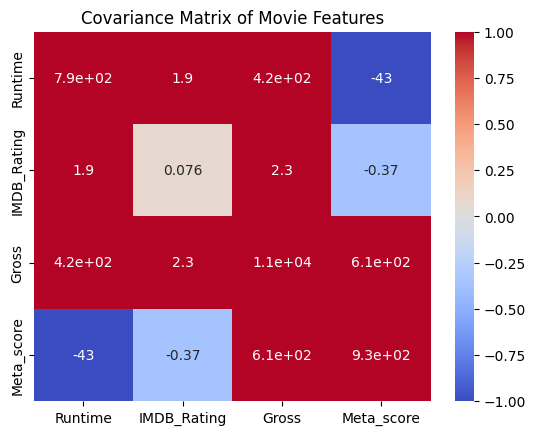

In [75]:
# Covariance Matrix Heatmap
sns.heatmap(df_cov.cov(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Covariance Matrix of Movie Features')
plt.show()


In [78]:
# Apply confidence intervals to estimate the average box office for different decades
df.groupby('Decade')['Gross'].mean()
cl = [0.90, 0.95, 0.98, 0.99]
def confidence_interval(df, col, cl):
        for c in cl:
            if pd.api.types.is_numeric_dtype(df[col]) and len(df[col].unique()) > 30:
                ci = stats.norm.interval(c, df[col].mean(), df[col].std()/np.sqrt(len(df)))
                print(f"For {col}, the {int(c*100)}% confidence interval is {ci}")
            else:
                ci = stats.t.interval(c, len(df[col].unique())-1)
                print(f"For {col}, the {int(c*100)}% confidence interval is {ci}")

confidence_interval(df, 'Gross', cl)

For Gross, the 90% confidence interval is (51.167063528368786, 61.9068964716312)
For Gross, the 95% confidence interval is (50.13832986363982, 62.93563013636017)
For Gross, the 98% confidence interval is (48.942204657765416, 64.13175534223457)
For Gross, the 99% confidence interval is (48.1277282717028, 64.94623172829719)


In [83]:
# Alternate solution:
cl = 0.95
df['tscore'] =stats.t.ppf((1+cl)/2, len(df['Gross'].unique())-1)

# Confidence Interval
df['lower-ci'] = df['Gross'].mean() - df['tscore'] * df['Gross'].std()/np.sqrt(len(df))
df['upper-ci'] = df['Gross'].mean() + df['tscore'] * df['Gross'].std()/np.sqrt(len(df))
df.head(10)

,IMDB_Rating,Series_Title,Runtime,Meta_score,Gross,Director,Decade,tscore,lower-ci,upper-ci
0,9.3,The Shawshank Redemption,142,80.0,28.34,Frank Darabont,1990.0,1.963223,50.127689,62.946271
1,9.2,The Godfather,175,100.0,134.97,Francis Ford Coppola,1970.0,1.963223,50.127689,62.946271
2,9.0,The Dark Knight,152,84.0,534.86,Christopher Nolan,2000.0,1.963223,50.127689,62.946271
3,9.0,The Godfather: Part II,202,90.0,57.30,Francis Ford Coppola,1970.0,1.963223,50.127689,62.946271
4,9.0,12 Angry Men,96,96.0,4.36,Sidney Lumet,1950.0,1.963223,50.127689,62.946271
5,8.9,The Lord of the Rings: The Return of the King,201,94.0,377.85,Peter Jackson,2000.0,1.963223,50.127689,62.946271
6,8.9,Pulp Fiction,154,94.0,107.93,Quentin Tarantino,1990.0,1.963223,50.127689,62.946271
7,8.9,Schindler's List,195,94.0,96.90,Steven Spielberg,1990.0,1.963223,50.127689,62.946271
8,8.8,Inception,148,74.0,292.58,Christopher Nolan,2010.0,1.963223,50.127689,62.946271
9,8.8,Fight Club,139,66.0,37.03,David Fincher,1990.0,1.963223,50.127689,62.946271


### Conclusion


The average movie duration for highly rated movie is 123 min

Frank Darabont makes the highest rated movie

2020 has the most outliers, when it comes to highly rated movies (in a positive way)

Runtime has a positive relationship with the IMDB rating but no relationship with Meta Score.